## Exploratory Data Analysis and Visualization

In this Kernel I perform EDA operations to better understand the Data.

I also visualize the various relationships in the data using plots of the features

I have also laid out the observations drawn from each of the plots and it's implication.


## QUESTION 1



We will load the pickle file we created after parsing the JSON Data.


In [1]:
#Importing all required Libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
##Reading serialized Pickle file 

df = pd.read_pickle('data/pickles/df_original')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [3]:
# Print Dimensions of the loaded data frame

print("Dataset Dimensions: {} rows x {} columns".format(df.shape[0], df.shape[1]))

Dataset Dimensions: 786363 rows x 29 columns


## Description of all the features

* **accountNumber** - Account number of the transaction.
* **customerId** - Customer ID related to the transaction and account number.
* **creditLimit** - The card's credit limit.<br>
* **availableMoney** - Available money in the account before the transaction.<br>
* **acqCountry** - This might be the country where the transaction took place. (Categorical Variable)<br>
* **transactionDateTime** - Date & Time of when the transcation took place. <br>
* **transactionAmount** - Amount of money transferred in the transaction.<br>
* **merchantName** - Amount received by which merchant. Needs to be split into two features based on the '#' character. (Categorical Variable)<br>
* **merchantCountryCode** - Country code of the merchant. Need to check if this is the same as "acqCountry".<br>
* **posEntryMode** - This two-digit code identifies the actual method used to enter the cardholder account number and card expiration date. (Categorical Variable)<br>
* **posConditionCode** -  Indicates transaction conditions at the point of sale or service. (Categorical Variable)<br>
* **merchantCategoryCode** - Category code for the merchant. (Categorical Variable)<br>
* **currentExpDate** - The current expiry date of the card. Needs to be split into features - expiry_month, expiry_year & expiry_epoch.<br>
* **accountOpenDate** - Date of account opening. Needs to be converted to epoch. This needs to be used with transaction date.<br>
* **dateOfLastAddressChange** - Date of last address change for the customer. This needs to be used with transaction date.<br>
* **cardCVV** - CVV of the card used for transaction.<br>
* **enteredCVV** - CVV which was entered. This needs to be matched with cardCVV.<br>
* **cardLast4Digits** - Last 4 digits of the card. This really shouldn't influence whether a transaction is fraud or not.<br>
* **transactionType** - Type of transaction. (Categorical variable) <br>
* **currentBalance** - Remaining amount after the transaction.<br>
* **cardPresent** - This might be a flag to tell if the card was present during the transaction or not.<br>
* **expirationDateKeyInMatch** - Not sure what this feature is exactly :(<br>
* **isFraud** - Flag to tell if the transaction was fraud or not.

## Check and Handle Nulls 

In [4]:
##Check for Null Values 

df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

A look at the missing values in our data set reveals that some columns have a very large amount of missing values which will certainly have an adverse effect on our modelling.

echoBuffer, merchantCity , merchantState, merchantZip ,posOnPremises, recurringAuthInd are respective columns with over 700,000 missing values. Keeping these columns will heavily influence our analysis considering the dimesions of our dataset. (786363x29)

The prudent action here would be to simply drop these columns

In [5]:
#dropping columns with large amount of missing values 

df.drop(['echoBuffer', 'merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'], \
        axis = 1, inplace = True)

df = df.reset_index(drop=True)

# Lets check to see nulls again
print(df.isnull().sum())


accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64


In comparison with the dimesions of our dataset the count of missing values displayed across the columns is quite less.
 
As the columns in which the values are missing are Categorical in Nature, we could simply replace those values with the most frequently appearing value.


In [6]:
#Performing Mode Imputation

df_Clean = df.copy()
df_Clean = df_Clean.fillna(df_Clean.mode().iloc[0])


# Print the new Dimensions of data after dropping columns

print("New Dataset Dimensions: {} rows x {} columns".format(df_Clean.shape[0], df_Clean.shape[1]))

New Dataset Dimensions: 786363 rows x 23 columns


## Summary Statistics of Numerical Data

Here I will subset important numerical data from our data frame and calculate their summary statistics. The number of null values, the unique values, the minimum Value, maximum value, mean value, standard deviation are some of the Statistics we will be looking at.

In [7]:
#Analyzing specific numeric columns and printing out essential summary statistics 

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

df_numeric = df_Clean[numeric_cols]

for col in df_numeric:
    print(f"Column: {col}")
    print(f"Number of null values: {df_Clean[col].isnull().sum()}")
    print(f"Number of unique values: {df_Clean[col].nunique()}")
    print(f"Minimum value: {df_Clean[col].min()}")
    print(f"Maximum value: {df_Clean[col].max()}")
    print(f"Mean value: {df_Clean[col].mean()}")
    print(f"Standard deviation: {df_Clean[col].std()}\n")


Column: creditLimit
Number of null values: 0
Number of unique values: 10
Minimum value: 250
Maximum value: 50000
Mean value: 10759.464458526152
Standard deviation: 11636.174889935899

Column: availableMoney
Number of null values: 0
Number of unique values: 521915
Minimum value: -1005.63
Maximum value: 50000.0
Mean value: 6250.725369288736
Standard deviation: 8880.783989148062

Column: transactionAmount
Number of null values: 0
Number of unique values: 66038
Minimum value: 0.0
Maximum value: 2011.54
Mean value: 136.98579095150708
Standard deviation: 147.7255690194876

Column: currentBalance
Number of null values: 0
Number of unique values: 487318
Minimum value: 0.0
Maximum value: 47498.81
Mean value: 4508.739089237413
Standard deviation: 6457.442068133206



## Summary Statistics of Categorical Data 

We will once again subset our original Data Frame and select certain important categorical columns and describe the summary statistics. 
Measures we will be looking at here include the Number of unique values and the Top 5 most frequent values.

In [8]:
# Select categorical columns
cat_cols = ['merchantName', 'acqCountry','merchantCountryCode', 'posEntryMode' , 'transactionType', 'isFraud']

df_categorical = df[cat_cols]

# Compute summary statistics for each categorical column
for col in df_categorical:
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Top 5 most frequent values:\n{df[col].value_counts().head()}\n")

Column: merchantName
Number of unique values: 2490
Top 5 most frequent values:
Uber           25613
Lyft           25523
oldnavy.com    16992
staples.com    16980
alibaba.com    16959
Name: merchantName, dtype: int64

Column: acqCountry
Number of unique values: 4
Top 5 most frequent values:
US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64

Column: merchantCountryCode
Number of unique values: 4
Top 5 most frequent values:
US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64

Column: posEntryMode
Number of unique values: 5
Top 5 most frequent values:
05    315035
09    236481
02    195934
90     19576
80     15283
Name: posEntryMode, dtype: int64

Column: transactionType
Number of unique values: 3
Top 5 most frequent values:
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

Column: isFraud
Number of unique values: 2
Top 5 most fr

# QUESTION 2 - PLOTS

## VISUALIZATION OF DATA

Here we will visualize the numerical data to draw inferences. Visualizing numerical data can help us gain several inferences, such as the Distributions and the existing Relationships in our data.

We can visualize the distribution of the data using histograms, density plots, or boxplots. This helps us understand whether the data is normally distributed or skewed, and identify any outliers.
Relationships:

We can visualize the relationship between two numerical variables using scatter plots. This helps us understand whether there is a correlation between the two variables and the nature of that correlation.


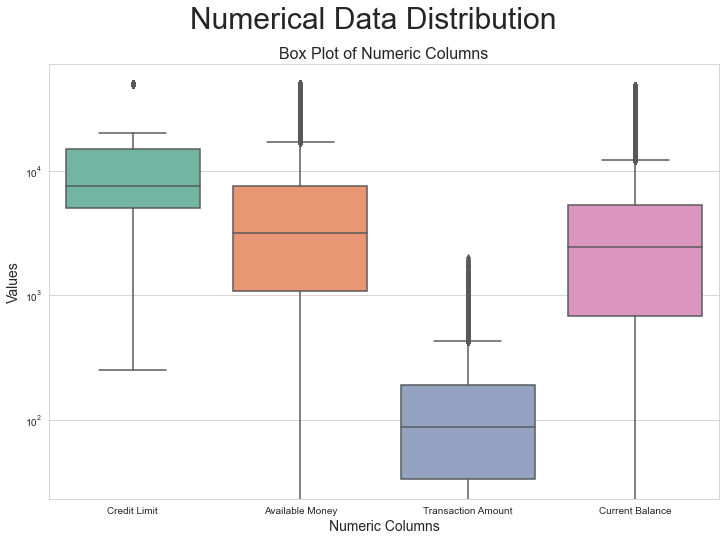

In [9]:
# Select numeric columns for the boxplot

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.boxplot(data=df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']], palette="Set2")
#I have used to log scale on the Y-axis as there is a huge difference in the values, this way be can visualize
#values less that $100
plt.yscale('log')
plt.title('Box Plot of Numeric Columns', fontsize=16)
plt.xlabel('Numeric Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.suptitle('Numerical Data Distribution', fontsize=30)
plt.xticks(ticks=range(4), labels=['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance'])
plt.show()


# Box Plot Observations

## Credit Limit 

- Credit Limit distribution appears to be as expected. There is a very high value of the outlier. This is ordinary as it is not easy to obtain a credit card with a high Credit Limit.

## Available Money

- One would generally expect that the money avilable for credit transactions would be higher.

- As the values increase the outliers increase. This is expected as larger sums are available only to a few customers.

## Transaction Amount 

- The observed transaction amounts are quite low. This could indicate that customers would rather not make heavy transactions on credit.

## Current Balance 

- Bank Balance for the customers appears to be quite low. This is surprising.


# Visualizing Histograms

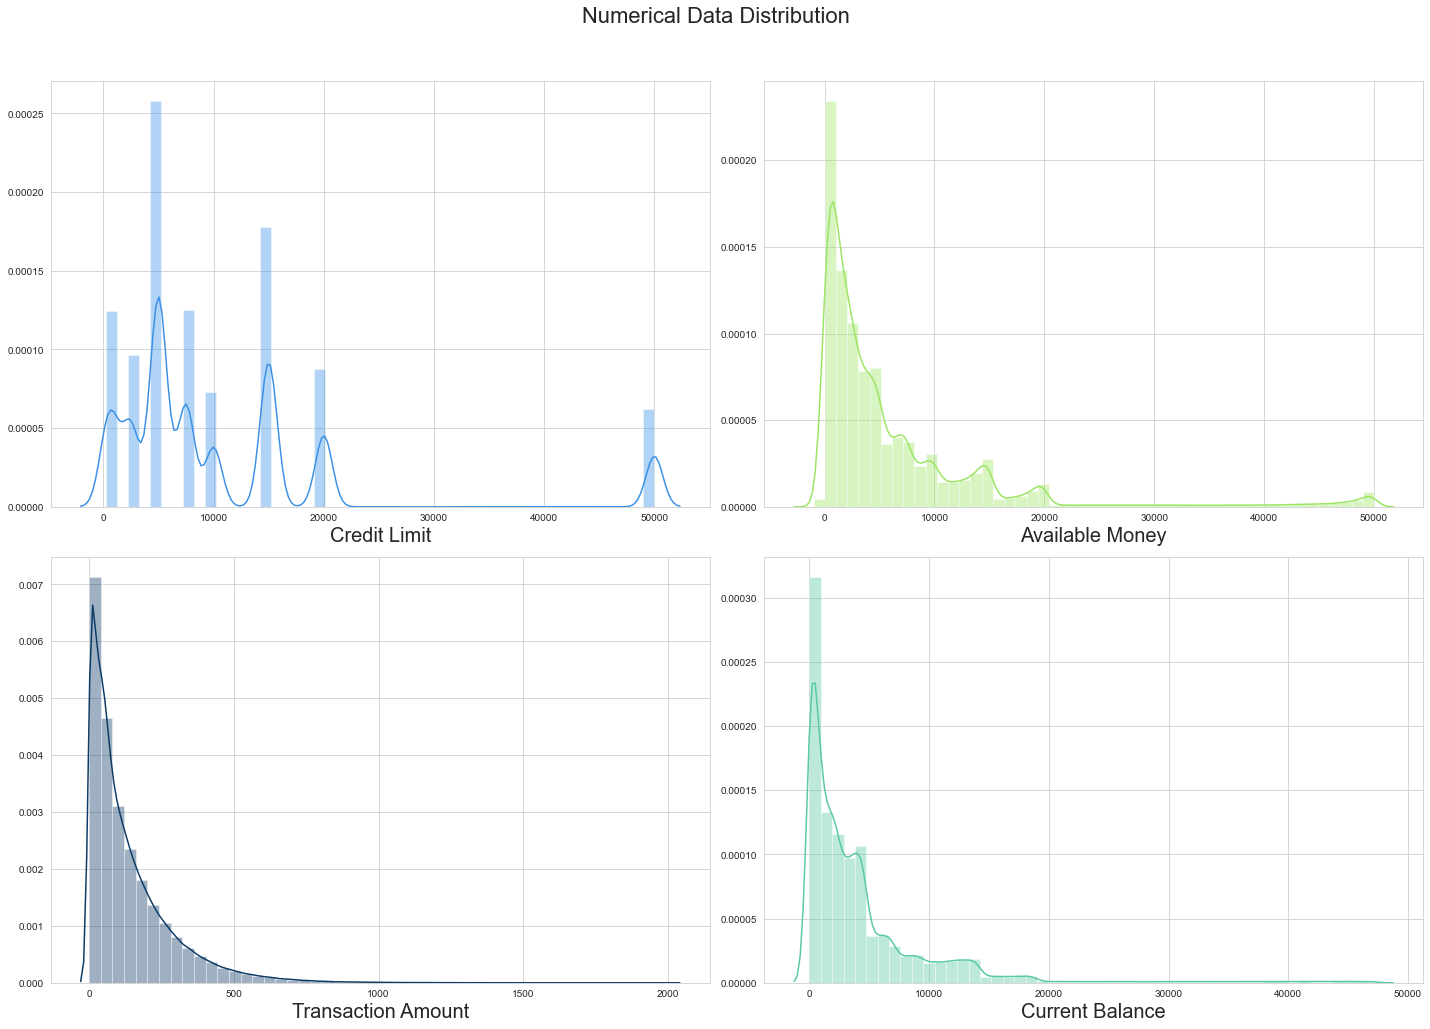

In [10]:
#Draw Histograms to Visulaize the Distributions of data in the given numerical fields

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#9BE564', '#0D3B66', '#59C9A5']

for i, ax in enumerate(axes.flat):
    sns.distplot(df[numeric_cols[i]], ax=ax, color=colors[i])
    ax.set_xlabel(neat_cols[i], fontsize=20)
    ax.set_ylabel('')
    
fig.suptitle('Numerical Data Distribution', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


## Observations from Histograms of Numerical data 

## Credit Limit 

- Credit Limit quite visibly follows a multi-modal distribution. There are multiple peaks in the distribution, with each peak representing a group of individuals with a specific credit limit range. This suggests that there may be different credit limit policies for different groups of customers or that different types of credit products are being offered to customers with different credit limits.

## Available Money 

- The Available money is quite visibly right skewed. This could mean that most of the customers have a lower available money balance, while a few customers have a very high available money balance. This suggests that most customers may be using their credit cards frequently.

## Transaction Amount 

- The Transaction amount distribution is right skewed as well. This is consistent with our earlier observation that the transaction amounts are quite low with few high outlier values.

## Current Balanace 

- Current Balance is right skewed as well, this too is consistent with our earlier observation that the Bank Balalnce of customers was low. 

# Plotting the Realtionship between Credit Limit and Transaction Amount

Text(0, 0.5, 'Transaction Amount')

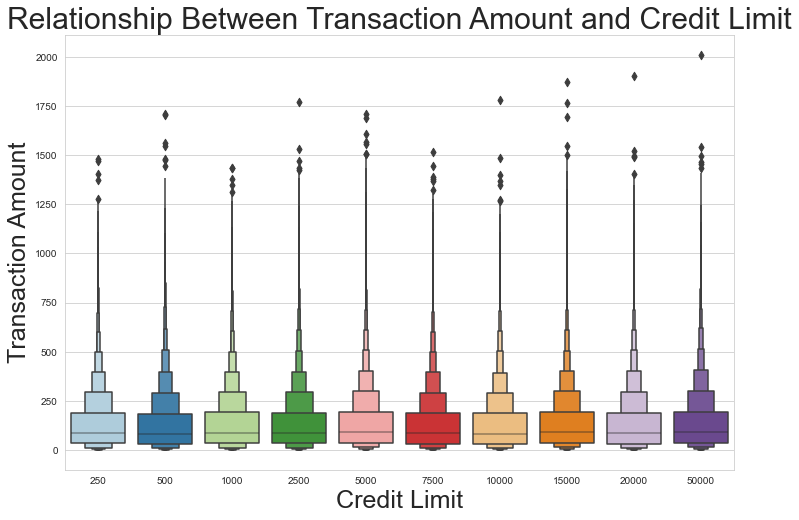

In [11]:
#Plotting a Box Plot ti visualize the relationship across the Credit Limit and Transaction Amounts Fields

fig = plt.subplots(figsize=(12, 8))
sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette="Paired")
plt.title('Relationship Between Transaction Amount and Credit Limit', fontsize = 30)
plt.xlabel('Credit Limit', fontsize = 25)
plt.ylabel('Transaction Amount', fontsize = 25)

## Observations from the Transaction Amount and Credit Limit Plot

- My initial hypothesis would have been that Higher Credit Limits would mean higher transaction amounts. This does not seem to be the case.

- The fact that a higher credit limit does not necessarily mean higher transaction amounts suggests that credit limits are not the only factor influencing transaction behavior.

# Relationship between Transaction Amount and Current Balance

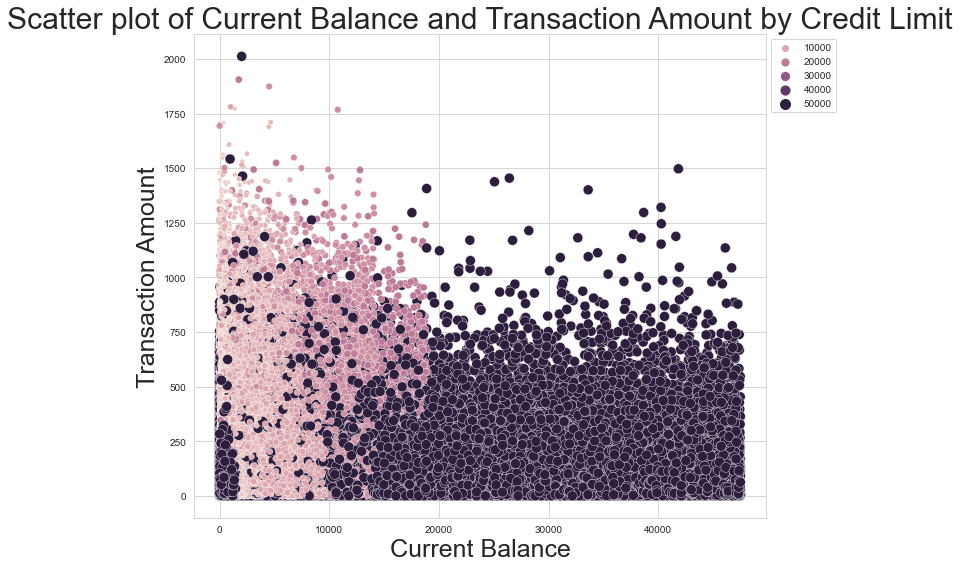

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))  
sns.scatterplot(data=df, x='currentBalance', y='transactionAmount', hue='creditLimit', size='creditLimit', sizes = (20,100))
            
plt.xlabel('Current Balance', fontsize = 25)
plt.ylabel('Transaction Amount', fontsize = 25)
plt.title('Scatter plot of Current Balance and Transaction Amount by Credit Limit', fontsize = 30)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  
plt.tight_layout() 
plt.show()


## Observations from the Transaction Amount and Current Balance Plot

- People with larger balances tend show higher credit limits. This could mean that individuals with larger balances have a higher ability to repay their debts, making them more attractive candidates for higher credit limits.


- Interesting that some people with really high credit limits have 0 in their current balance. This could suggest that these individuals are more financially stable and have a higher ability to repay their debts. It is possible that they are using their credit cards primarily for convenience or for the rewards and benefits that come with credit card usage, rather than relying on credit to finance their expenses.

## CARD CVV & ENTERED CVV

I will create a new feature here called the Match CVV. The idea is to check if there is match between the Card CVV and the Entered CVV

We will also drop the Card and Entered CVV columns once we find a match value

In [13]:
def MatchCVV(df):
    df["matchCVV"] = df["cardCVV"] == df["enteredCVV"]
    df["matchCVV"] = df["matchCVV"].astype(int)

    df.drop(['cardCVV','enteredCVV'], axis=1, inplace=True)
    return df

df_new = MatchCVV(df_Clean)

In [14]:
df_new.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchCVV
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,06/2023,2015-03-14,2015-03-14,1803,PURCHASE,0.0,False,False,False,1
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,02/2024,2015-03-14,2015-03-14,767,PURCHASE,0.0,True,False,False,1
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,False,False,False,1
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,08/2025,2015-03-14,2015-03-14,767,PURCHASE,0.0,False,False,False,1
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,10/2029,2015-08-06,2015-08-06,3143,PURCHASE,0.0,True,False,False,1


Percentage of Fraudulent transactions having matching CVV = 98.365%


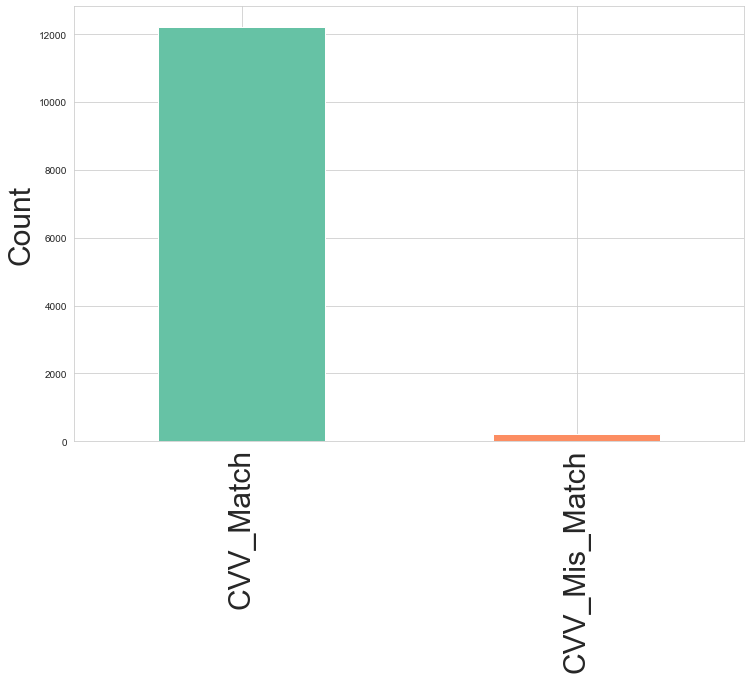

In [15]:
fraudTransactions = df_new.loc[df_new['isFraud'] == 1]

fig = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("Set2", len(fraudTransactions))
fraudTransactions['matchCVV'].value_counts().plot.bar(color =colors)
plt.xticks(ticks=[0,1], labels=['CVV_Match', 'CVV_Mis_Match'], fontsize=30)
plt.ylabel('Count', fontsize=30)
percentage = 100*fraudTransactions["matchCVV"].value_counts()[1]/(fraudTransactions["matchCVV"].value_counts()[1] + fraudTransactions["matchCVV"].value_counts()[0])
print(f"Percentage of Fraudulent transactions having matching CVV = {round(percentage, 3)}%")


CVV Match is quite predominant at 98.365% even in Fraudulent Transactions.

This is worrysome as it indicated that secure cvv codes are not deterrents for Fraudulent transactions.

## Presence of Card 

Percentage of Fraudulent transactions having Card Absent = 72.175%


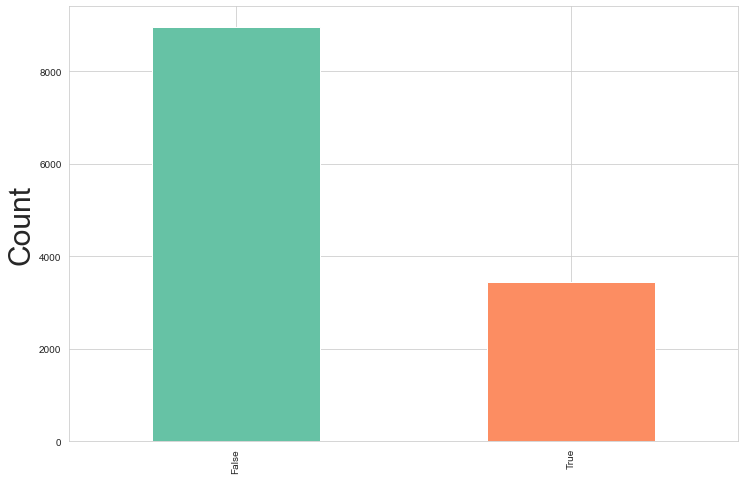

In [16]:
fraudTransactions = df_new.loc[df_new['isFraud'] == 1]

fig = plt.subplots(figsize=(12, 8))
plt.ylabel('Count', fontsize=30)
colors = sns.color_palette("Set2", len(fraudTransactions))
fraudTransactions['cardPresent'].value_counts().plot.bar(color = colors)
percentage = 100*fraudTransactions["cardPresent"].value_counts()[0]/(fraudTransactions["cardPresent"].value_counts()[1] + fraudTransactions["cardPresent"].value_counts()[0])
print(f"Percentage of Fraudulent transactions having Card Absent = {round(percentage, 3)}%")


Percentage of Fraudulent transactions where card was absent = 2.067%


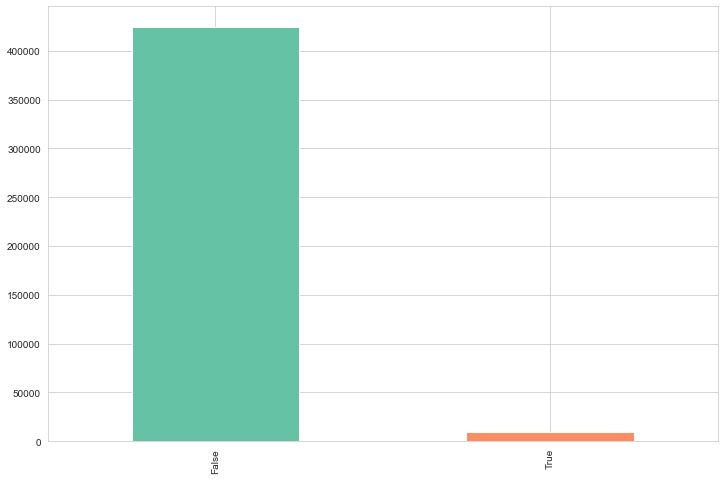

In [17]:
cardAbsentTransactions = df_new.loc[df_new['cardPresent'] == 0]

fig = plt.subplots(figsize=(12, 8))

colors = sns.color_palette("Set2", len(cardAbsentTransactions))
cardAbsentTransactions['isFraud'].value_counts().plot.bar(color = colors)
percentage = 100*cardAbsentTransactions["isFraud"].value_counts()[1]/(cardAbsentTransactions["isFraud"].value_counts()[1] + cardAbsentTransactions["isFraud"].value_counts()[0])
print(f"Percentage of Fraudulent transactions where card was absent = {round(percentage, 3)}%")

### OBSERVATION

This is quite interesting. Fraudsters seem to have been able to mimic the presence of a card or actually possess cards.

## Merchant Name 

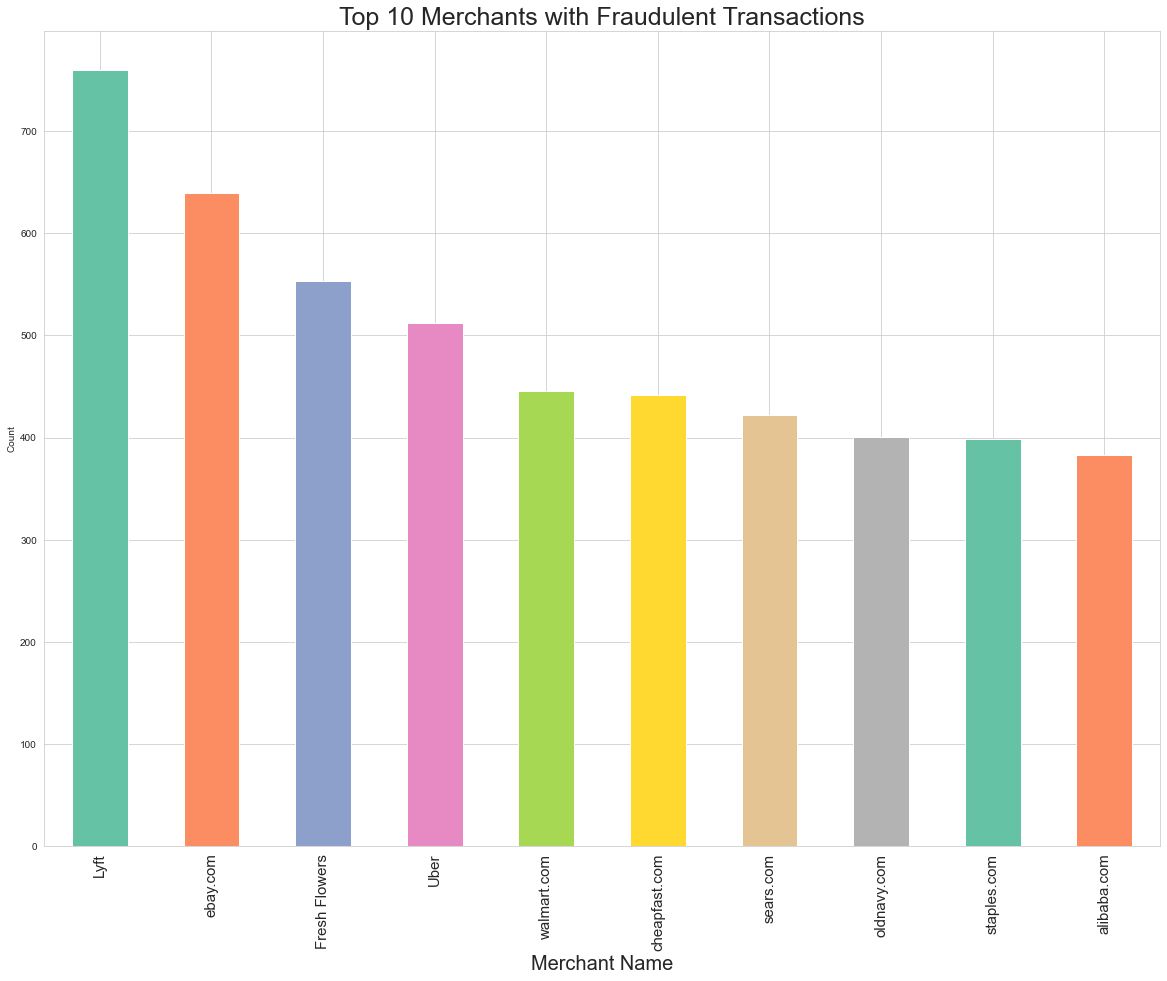

In [18]:
fraudTransactions = df_new.loc[df_new['isFraud'] == 1]
fig = plt.subplots(figsize=(20, 15))

top_merchants = fraudTransactions["merchantName"].value_counts()[:10]
colors = sns.color_palette("Set2", len(top_merchants))

top_merchants.plot.bar(color=colors)
plt.xlabel('Merchant Name', fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Count')
plt.title('Top 10 Merchants with Fraudulent Transactions', fontsize = 25)
plt.show()


Lyft and Ebay Show the Highest Number of Fraudulent Transactions.

This could be indicative of the fact that Fraudsters will mask fradulent transactions under legitimate brand names to avoid suspiscion. 

## Top 10 Accounts with Most Frauds

Text(0.5, 1.0, 'Top 10 Accounts with the Most Fraudulent Transactions')

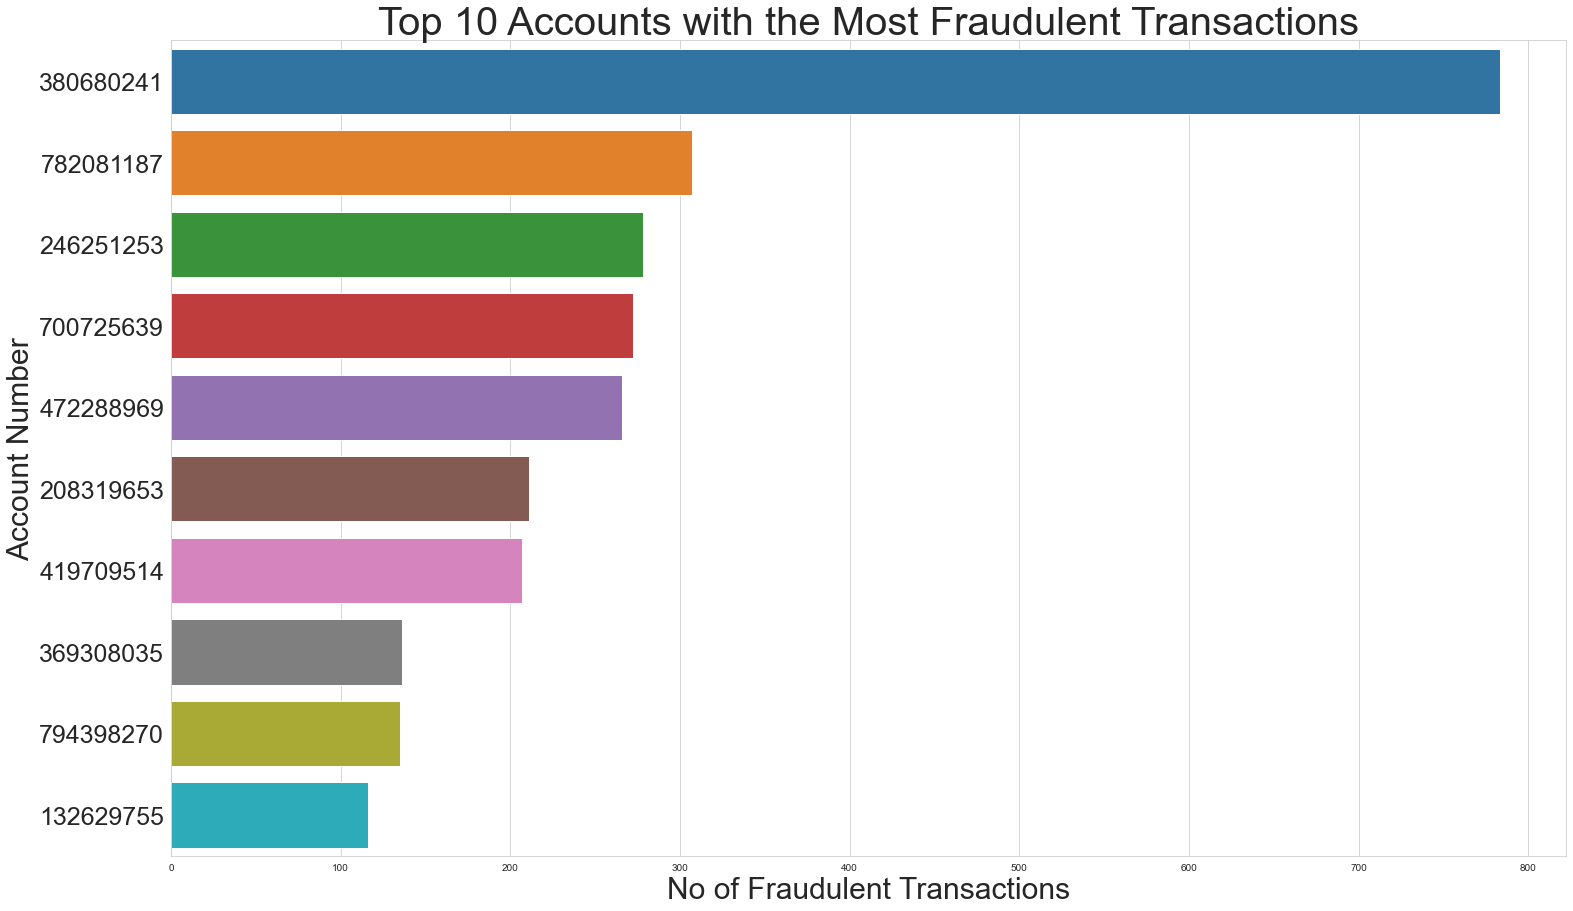

In [19]:
fraudTransactions = fraudTransactions = df_new.loc[df_new['isFraud'] == 1]
plt.figure(figsize=(25,15))

fraudulent_accounts = fraudTransactions['accountNumber'].value_counts().head(10)
sns.barplot(y=list(range(10)), x=fraudulent_accounts.values, orient='h')

plt.yticks(ticks=list(range(10)), labels=fraudulent_accounts.index.tolist(), fontsize = 25)
plt.ylabel('Account Number', fontsize=30)
plt.xlabel('No of Fraudulent Transactions', fontsize=30)
plt.title('Top 10 Accounts with the Most Fraudulent Transactions', fontsize= 40)

It is interesting to observe that such a huge number of fraudelent transactions can be mapped to one Account Number.

In [20]:
#Save Data to Pickle

pd.to_pickle(df_new, 'data/pickles/df_new', protocol=4)